In [1]:
# make Notebook wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("immo_data.csv")     

print("df shape:", df.shape)
display(df.info())
display(df.head())

./build_model.ipynb
./README.md
./immo_data.csv.zip
./immo_data.csv
./capstoneProject__xgboost.ipynb
./capstoneProject_linearRegresion.ipynb
./immo_data_final.csv
./data_analysis.ipynb
./server/Dockerfile
./server/model_xg_0.6_20.bin
./server/Pipfile.lock
./server/serve.py
./server/train_model.py
./server/Pipfile
./server/__pycache__/serve.cpython-38.pyc
./server/.ipynb_checkpoints/build_model-checkpoint.ipynb
./.ipynb_checkpoints/data_analysis-checkpoint.ipynb
./.ipynb_checkpoints/build_model-checkpoint.ipynb
./.ipynb_checkpoints/capstoneProject_linearRegresion-checkpoint.ipynb
./.ipynb_checkpoints/capstoneProject__xgboost-checkpoint.ipynb
df shape: (268850, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  f

None

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [2]:

import matplotlib.pyplot as plt

# pd.set_option('max_columns', None)

def plot_barh(dict, title=""):
    full_height = (len(dict.keys())) / 3
    plt.figure(figsize=(10, full_height))
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    pp = plt.barh(list(dict.keys()), list(dict.values()), align='center', alpha=0.5)

    for p in pp:
       width = p.get_width()
       plt.annotate('{}'.format(width),
          xy=(width, p.get_y()),
          xytext=(3, 6),
          textcoords="offset points",
          ha='left', va='center')
    plt.show()

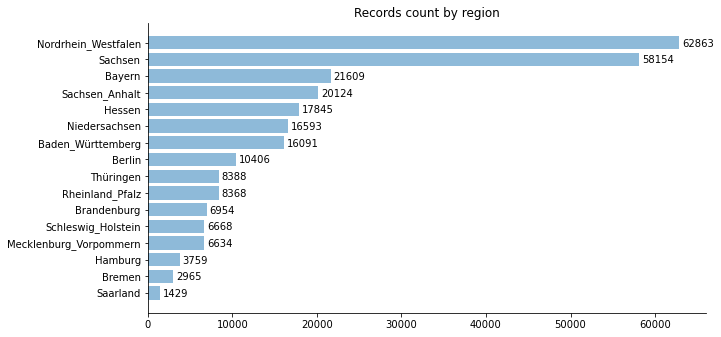

In [3]:
record_count_by_region = df.groupby(['regio1']).size().sort_values(ascending=True).to_dict()
plot_barh(record_count_by_region, "Records count by region")


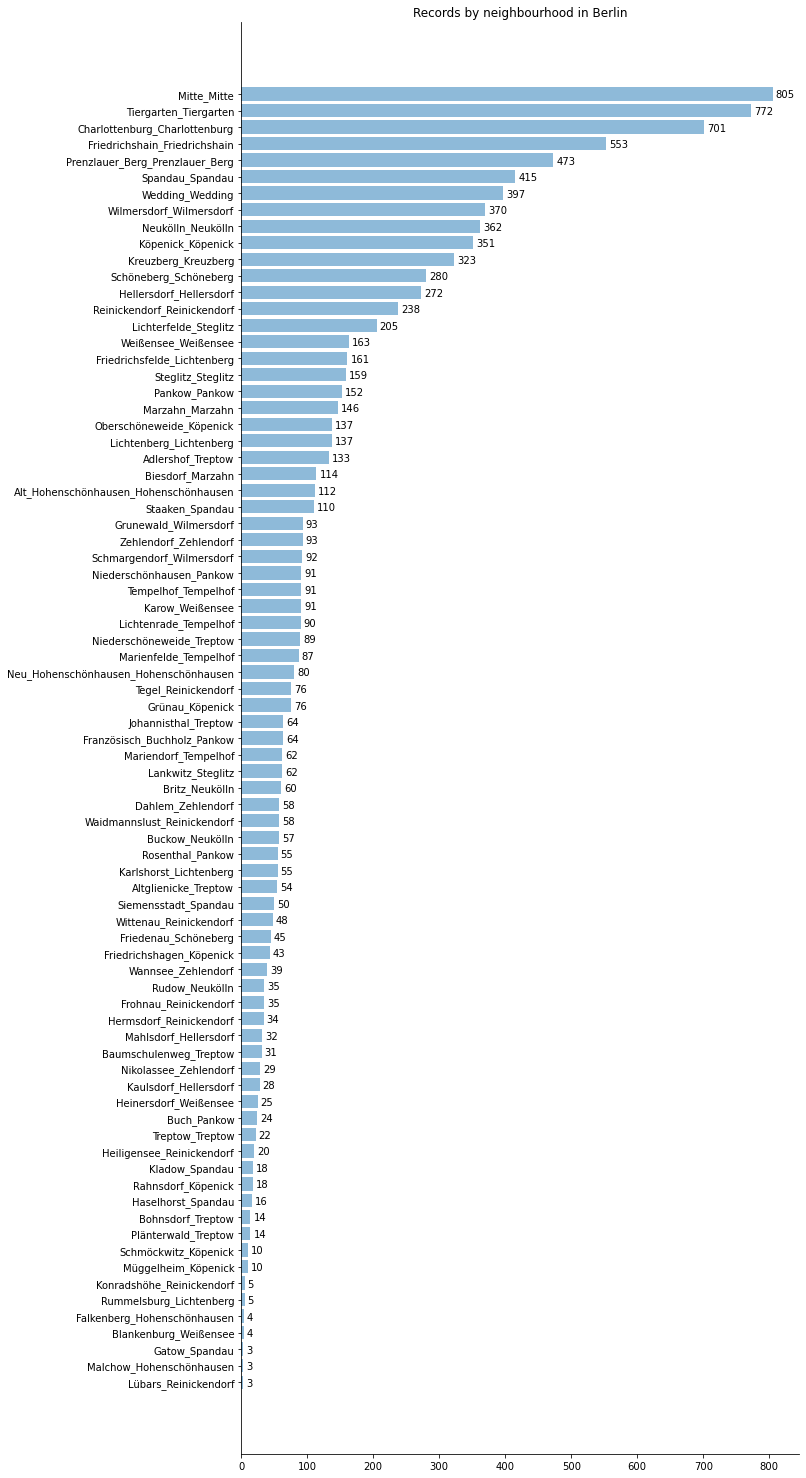

In [4]:

berlinDf = df[df['regio1']=='Berlin']
records_by_neighbourhood_in_berlin = berlinDf.groupby(['regio3']).size().sort_values(ascending=True).to_dict()
plot_barh(records_by_neighbourhood_in_berlin, "Records by neighbourhood in Berlin")


NA records by feature:


<AxesSubplot:>

regio1                      0
regio3                      0
heatingType              1471
newlyConst                  0
balcony                     0
picturecount                0
totalRent                 662
yearConstructed          1425
noParkSpaces             8393
firingTypes              2284
hasKitchen                  0
geo_bln                     0
cellar                      0
baseRent                    0
livingSpace                 0
condition                2268
interiorQual             4208
petsAllowed              4838
lift                        0
typeOfFlat                804
noRooms                     0
floor                    1100
numberOfFloors           3127
garden                      0
heatingCosts             4769
energyEfficiencyClass    6917
lastRefurbish            7070
dtype: int64

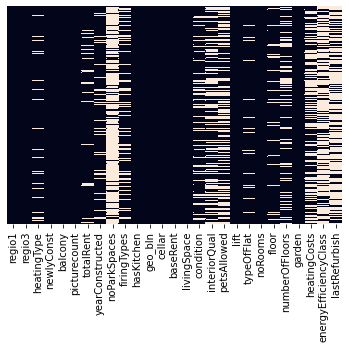

In [12]:
import seaborn as sns

useful_columns = [
    'regio1', 'regio3', 'heatingType', 'newlyConst', 'balcony', 'picturecount', 'totalRent', 'yearConstructed', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln', 'cellar', 'baseRent', 'livingSpace', 'condition', 'interiorQual', 'petsAllowed', 'lift', 'typeOfFlat', 'noRooms', 'floor', 'numberOfFloors', 'garden', 'heatingCosts', 'energyEfficiencyClass', 'lastRefurbish', 
]
berlinDf_select = berlinDf[useful_columns]

print("NA records by feature:")

display(sns.heatmap(berlinDf_select.isna(), yticklabels=False, cbar=False, ))

berlinDf_select.isna().sum()


In [ ]:

# We will be removing: ['yearConstructed', 'noParkSpaces', 'floor', 'numberOfFloors', 'typeOfFlat', 'heatingCosts', 'lastRefurbish', 'interiorQual']
# because there are too many NA values, and feature are not that important.
berlinDf_select = berlinDf_select.drop(['yearConstructed', 'noParkSpaces', 'floor', 'numberOfFloors', 'typeOfFlat', 'heatingCosts', 'lastRefurbish', 'interiorQual', 'petsAllowed', 'energyEfficiencyClass', 'firingTypes'], axis='columns')

# Also ['regio1', 'totalRent', 'picturecount', 'condition', 'geo_bln'] is not a value that we want to predict on.
berlinDf_select = berlinDf_select.drop(['regio1', 'totalRent', 'picturecount', 'condition', 'geo_bln'], axis='columns')

berlinDf_select.isna().sum()

# We will be keeping ['heatingType', 'firingTypes'] because I still think they are relevant. We will fill NA with NO_INFORMATION and experiemtn with the model.


In [ ]:
# Show correlation between numerical types:

correlation = berlinDf_select.corr()

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
sn.heatmap(correlation, annot=True, cbar=False, linewidths=.5, cmap="YlGnBu", fmt='.2f', annot_kws={'size': 15})
plt.tick_params(axis='both', which='major', labelsize=23, labelbottom = True, bottom=True, top = True, labeltop=True, right=True, labelright=True)
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 

plt.show()

# Checking the baseRent corelation with possible features:
# Data shows that livingSpace and noRooms has the highest corelation ~0.8. 
# But constucton year is important too ~0.5.
# Surprisingly seems like heatingCost is also directly corelated with baseRent too. I was expecting this to be inverse corelated.

# Result: We will experiement with following columns for training: livingSpace, noRooms, heatingCosts, hasKitchen, cellar, garden, balcony
#         Plus categorical columns for: heatingType, firingTypes, condition', 'interiorQual', 'petsAllowed, energyEfficiencyClass


In [ ]:
import matplotlib.pyplot as plt


def plot_ticks(x, y, x_label, y_label):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

for c in ["livingSpace", "noRooms", "hasKitchen", "cellar", "garden", "balcony"]:
    plot_ticks(berlinDf_select["baseRent"], berlinDf_select[c], 'baseRent', c)
  

In [ ]:
for c in ["heatingType"]:
    berlinDf_select[c] = berlinDf_select[c].fillna("NO_INFORMATION")
    classes = berlinDf_select[c].unique()
    data = {}
    for cl in classes:
        mean = berlinDf_select[berlinDf_select[c]==cl]["baseRent"].mean()
        data[str(cl)] = round(mean,0)
    plot_barh(data, c)


In [ ]:
# we need to reduce the heatingType to 2..3 categorical values to not be hard to predict for users
# new 'heating' column: ['low', 'normal', 'high']
# 'NO_INFORMATION' will result in 'heating'='normal'

berlinDf_select['heatingType'].unique()

conditions = [
    (berlinDf_select['heatingType']== 'night_storage_heater'),
    (berlinDf_select['heatingType']== 'solar_heating'),
    
    (berlinDf_select['heatingType']== 'self_contained_central_heating'),
    (berlinDf_select['heatingType']== 'heat_pump'),
    (berlinDf_select['heatingType']== 'gas_heating'),
    (berlinDf_select['heatingType']== 'combined_heat_and_power_plant'),
    (berlinDf_select['heatingType']== 'district_heating'),
    (berlinDf_select['heatingType']== 'floor_heating'),
    (berlinDf_select['heatingType']== 'central_heating'),
    
    (berlinDf_select['heatingType']== 'stove_heating'),
    (berlinDf_select['heatingType']== 'electric_heating'),
    (berlinDf_select['heatingType']== 'wood_pellet_heating'),
    (berlinDf_select['heatingType']== 'oil_heating'),
    
    (berlinDf_select['heatingType']== 'NO_INFORMATION'),
]

result = ['low', 'low', 
          'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
          'high', 'high', 'high', 'high',
          'normal']
    
berlinDf_select['heating'] = np.select(conditions, result)
berlinDf_select.drop('heatingType', axis='columns', inplace=True)
berlinDf_select



In [ ]:
# 'regio3' contains the neighbourhoods and also the subneighbourhoods in following format: "subneighbourhood_neighbourhoods"
# we will only keep neighbourhood to be easier to predit

berlinDf_select['regio3'].unique()
berlinDf_select[['subneighbourhoods','neighbourhoods']] = pd.DataFrame(berlinDf_select.regio3.str.split('_', 1, expand=True))
berlinDf_select['neighbourhoods'] = ['Prenzlauer_Berg' if n == "Berg_Prenzlauer_Berg" else n for n in berlinDf_select['neighbourhoods']]
berlinDf_select['neighbourhoods'] = ['Hohenschönhausen' if n == "Hohenschönhausen_Hohenschönhausen" else n for n in berlinDf_select['neighbourhoods']]
berlinDf_select['neighbourhoods'] = ['Pankow' if n == "Buchholz_Pankow" else n for n in berlinDf_select['neighbourhoods']]

# neighbourhoods to lowercase
berlinDf_select['neighbourhoods'] = [n.lower() for n in berlinDf_select['neighbourhoods']]

#rename  neighbourhoodscolumn name
berlinDf_select.rename(columns = {'neighbourhoods': 'neighbourhood'}, inplace = True)
berlinDf_select.rename(columns = {'subneighbourhoods': 'subneighbourhood'}, inplace = True)

print("subneighbourhoods count:", len(berlinDf_select['subneighbourhood'].unique()))
neighbourhoods = berlinDf_select['neighbourhood'].unique()
print("neighbourhoods count:", len(neighbourhoods))
print("neighbourhoods:", neighbourhoods)

berlinDf_select.drop('regio3', axis='columns', inplace=True)
berlinDf_select.drop('subneighbourhood', axis='columns', inplace=True)

berlinDf_select

In [ ]:
# make baseRent, livingSpace and noRooms ab Int
berlinDf_select['baseRent'] = berlinDf_select['baseRent'].astype('int').values
berlinDf_select['livingSpace'] = berlinDf_select['livingSpace'].astype('int').values
berlinDf_select['noRooms'] = berlinDf_select['noRooms'].astype('int').values
berlinDf_select

In [ ]:
# We will:
#     - later experiment training by exluding the ["hasKitchen", "cellar", "garden", "balcony"]
#     - remove records with baseRent bigger than 5000 and 7500
#     - remove record with noRooms > 10

berlinDf_final = berlinDf_select
berlinDf_final = berlinDf_final.drop(berlinDf_final[berlinDf_final['baseRent']>5000].index)
berlinDf_final = berlinDf_final.drop(berlinDf_final[berlinDf_final['noRooms']>10].index)


berlinDf_final


In [ ]:
print("Final data:")
display(berlinDf_final.isna().sum())
berlinDf_final.reset_index(drop=True, inplace=True)

pd.set_option('display.max_columns', None)
berlinDf_final

In [ ]:
# Split data

from sklearn.model_selection import train_test_split

def split_dataFrame(df_to_split):
    df_full_train, df_test = train_test_split(df_to_split, test_size=0.2, random_state=11)
    df_train,  df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

    df_full_train = df_full_train.reset_index(drop=True)
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_full_train = df_full_train.baseRent
    y_train = df_train.baseRent
    y_val = df_val.baseRent
    y_test = df_test.baseRent


    del df_full_train["baseRent"]
    del df_train["baseRent"]
    del df_val["baseRent"]
    del df_test["baseRent"]

    # with pd.option_context('display.max_rows', 2, 'display.max_columns', None): 
    #     display(df_test)   

    print("df_to_split length: ", len(df_to_split))
    print()
    print("df_full_train length: ", len(df_full_train))
    print("df_train length: ", len(df_train))
    print("df_val length: ", len(df_val))
    print("df_test length: ", len(df_test))
    print()
    print("y_full_train length: ", len(y_full_train))
    print("y_train length: ", len(y_train))
    print("y_val length: ", len(y_val))
    print("y_test length: ", len(y_test))
    
    return df_full_train, df_train, df_val, df_test, y_full_train, y_train, y_val, y_test

split_dataFrame(berlinDf_select)
""